In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:

# Windows and Mac
valid_dir = os.path.join(r"./dataset/car parts" , "test")

In [3]:
valid_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range = 10,
    width_shift_range = 0.2,
	height_shift_range = 0.2,
	horizontal_flip = True
        )

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(254, 254),
    batch_size=16,
    class_mode="categorical",
)

Found 200 images belonging to 40 classes.


In [4]:
# Load the saved model
checkpoint_path = r"./checkpoints/cp-06.keras"

# get class names from the generator
class_names = list(valid_generator.class_indices.keys())

# Load the model let´s goooooo
model = tf.keras.models.load_model(checkpoint_path)
if model is not None:
    print("Model loaded successfully.")
else:
    print("Failed to load the model.")

# Define the image route so later I only need to add the image name
image_route = r"./testImages/"

Model loaded successfully.


1/1 ━━━━━━━━━━━━━━━━━━━━ 34s 34s/step


C:\Users\patom\AppData\Local\Temp\ipykernel_11736\539573754.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(class_names, rotation=90)


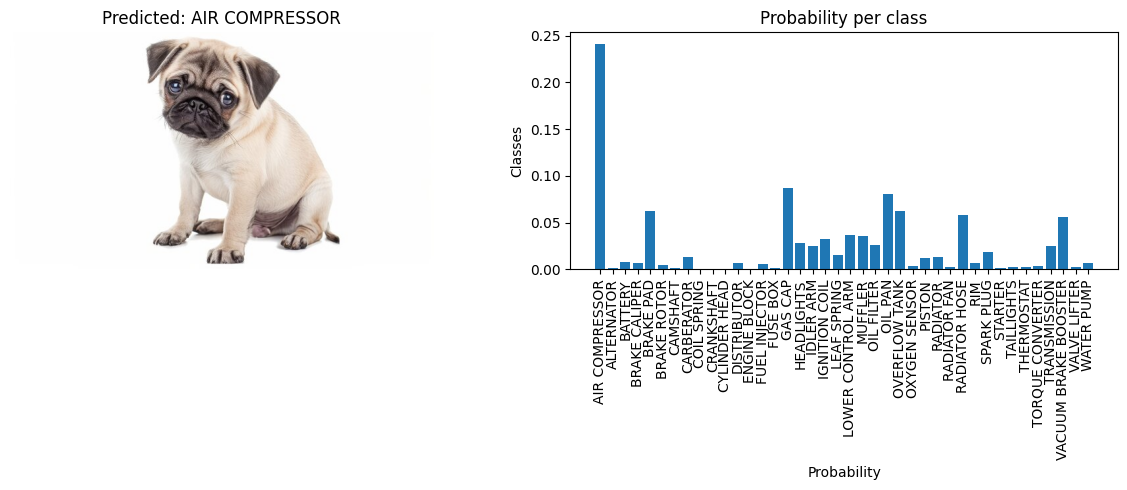

In [5]:
# Image name
#image_name = input()
image_name = "pug.jpg" 

# Construct the full image path
image_path = os.path.join(image_route , image_name)

# Load and preprocess the image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(254, 254))
image = tf.keras.preprocessing.image.img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

# Make predictions
predictions = model.predict(image)
predicted_class = np.argmax(predictions, axis=1)[0]

# Create a figure with 2 subplots stacked vertically
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5 ))

# Plot the image in the first subplot
display_image = tf.keras.preprocessing.image.load_img(image_path)
ax1.imshow(display_image)
ax1.set_title(f"Predicted: {class_names[predicted_class]}")
ax1.axis("off")

# Plot the probabilities in the second subplot
ax2.bar(class_names, predictions[0])
ax2.set_xlabel('Probability')
ax2.set_xticklabels(class_names, rotation=90)
ax2.set_ylabel('Classes')
ax2.set_title('Probability per class')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()